In [3]:
pip install scikit-fuzzy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.0/994.0 KB 20.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894086 sha256=6bce4449389ffad24ae7a813382c348c71de1de735311593909fb1b5ed31f567
  Stored in directory: /root/.cache/pip/wheels/32/2c/a1/a90a7d7dd8448ec029f298a61f3490275e99b17aa348be675c
Successfully built scikit-fuzzy


41.666666666666664


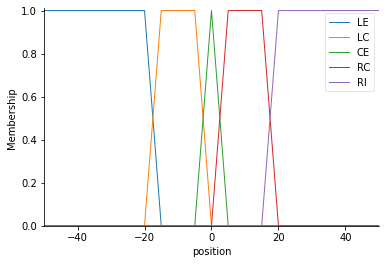

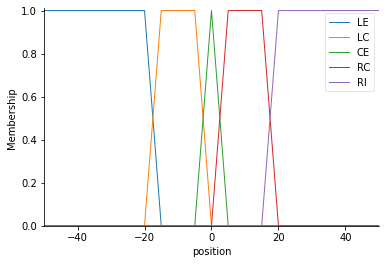

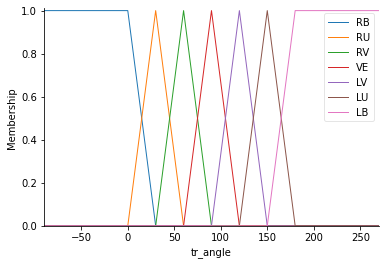

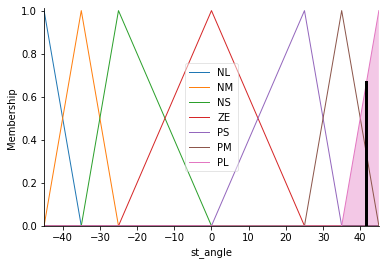

In [5]:
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt
from skfuzzy import control as ctrl

position = ctrl.Antecedent(np.arange(-50,51,5),'position')
tr_angle = ctrl.Antecedent(np.arange(-90,271,30),'tr_angle')
st_angle = ctrl.Consequent(np.arange(-45,46,1),'st_angle')

position['LE'] =fuzz.trapmf(position.universe, [-50,-50,-20,-15])
position['LC']= fuzz.trapmf(position.universe, [-20,-15,-5,0])
position['CE']= fuzz.trapmf(position.universe, [-4,0,0,4])
position['RC']= fuzz.trapmf(position.universe, [0,5,15,20])
position['RI']= fuzz.trapmf(position.universe, [15,20,50,50])


tr_angle['RB']= fuzz.trapmf(tr_angle.universe, [-90,-90,0,30])
tr_angle['RU']= fuzz.trapmf(tr_angle.universe, [0,30,30,60])
tr_angle['RV']= fuzz.trapmf(tr_angle.universe, [30,60,60,90])
tr_angle['VE']= fuzz.trapmf(tr_angle.universe, [80,90,90,100])
tr_angle['LV']= fuzz.trapmf(tr_angle.universe, [90,120,120,150])
tr_angle['LU']= fuzz.trapmf(tr_angle.universe, [120,150,150,180])
tr_angle['LB']= fuzz.trapmf(tr_angle.universe, [150,180,270,270])
#tr_angle.view()

st_angle['NL'] = fuzz.trimf(st_angle.universe,[-45,-45,-35])
st_angle['NM'] = fuzz.trimf(st_angle.universe,[-45,-35,-25])
st_angle['NS'] = fuzz.trimf(st_angle.universe,[-35,-25,0])
st_angle['ZE'] = fuzz.trimf(st_angle.universe,[-25,0,25])
st_angle['PS'] = fuzz.trimf(st_angle.universe,[0,25,35])
st_angle['PM'] = fuzz.trimf(st_angle.universe,[25,35,45])
st_angle['PL'] = fuzz.trimf(st_angle.universe,[35,45,45])
position.view()
position.view()
tr_angle.view()
rule1= ctrl.Rule(position['LE']&tr_angle['RB'],st_angle['NL'])
rule2= ctrl.Rule(position['LC']&tr_angle['RB'],st_angle['NL'])
rule3= ctrl.Rule(position['CE']&tr_angle['RB'],st_angle['NM'])
rule4= ctrl.Rule(position['RC']&tr_angle['RB'],st_angle['NM'])
rule5= ctrl.Rule(position['RI']&tr_angle['RB'],st_angle['NS'])

rule6= ctrl.Rule(position['LE']&tr_angle['RU'],st_angle['NL'])
rule7= ctrl.Rule(position['LC']&tr_angle['RU'],st_angle['NL'])
rule8= ctrl.Rule(position['CE']&tr_angle['RU'],st_angle['NM'])
rule9= ctrl.Rule(position['RC']&tr_angle['RU'],st_angle['NS'])
rule10= ctrl.Rule(position['RI']&tr_angle['RU'],st_angle['PS'])

rule11= ctrl.Rule(position['LE']&tr_angle['RV'],st_angle['NL'])
rule12= ctrl.Rule(position['LC']&tr_angle['RV'],st_angle['NM'])
rule13= ctrl.Rule(position['CE']&tr_angle['RV'],st_angle['NS'])
rule14= ctrl.Rule(position['RC']&tr_angle['RV'],st_angle['PS'])
rule15= ctrl.Rule(position['RI']&tr_angle['RV'],st_angle['PM'])

rule31= ctrl.Rule(position['LE']&tr_angle['VE'],st_angle['NM'])
rule32= ctrl.Rule(position['LC']&tr_angle['VE'],st_angle['NM'])
rule33= ctrl.Rule(position['CE']&tr_angle['VE'],st_angle['ZE'])
rule34= ctrl.Rule(position['RC']&tr_angle['VE'],st_angle['PM'])
rule35= ctrl.Rule(position['RI']&tr_angle['VE'],st_angle['PM'])

rule26= ctrl.Rule(position['LE']&tr_angle['LV'],st_angle['NM'])
rule27= ctrl.Rule(position['LC']&tr_angle['LV'],st_angle['NS'])
rule28= ctrl.Rule(position['CE']&tr_angle['LV'],st_angle['PS'])
rule29= ctrl.Rule(position['RC']&tr_angle['LV'],st_angle['PM'])
rule30= ctrl.Rule(position['RI']&tr_angle['LV'],st_angle['PL'])

rule16= ctrl.Rule(position['LE']&tr_angle['LU'],st_angle['NS'])
rule17= ctrl.Rule(position['LC']&tr_angle['LU'],st_angle['PS'])
rule18= ctrl.Rule(position['CE']&tr_angle['LU'],st_angle['PM'])
rule19= ctrl.Rule(position['RC']&tr_angle['LU'],st_angle['PL'])
rule20= ctrl.Rule(position['RI']&tr_angle['LU'],st_angle['PL'])

rule21= ctrl.Rule(position['LE']&tr_angle['LB'],st_angle['PS'])
rule22= ctrl.Rule(position['LC']&tr_angle['LB'],st_angle['PM'])
rule23= ctrl.Rule(position['CE']&tr_angle['LB'],st_angle['PM'])
rule24= ctrl.Rule(position['RC']&tr_angle['LB'],st_angle['PL'])
rule25= ctrl.Rule(position['RI']&tr_angle['LB'],st_angle['PL'])

tipping_ctrl = ctrl.ControlSystem([rule1,rule2,rule3,rule4,rule5,rule6,rule7,rule8,rule9,rule10,rule11,rule12,
                                   rule13,rule14,rule15,rule16,rule17,rule18,rule19,rule20,rule21,rule22,rule23,rule24,rule25,rule26,rule27,
                                   rule28,rule29,rule30,rule31,rule32,rule33,rule34,rule35])
tipping = ctrl.ControlSystemSimulation(tipping_ctrl)
tipping.input['position'] = 50
tipping.input['tr_angle'] = 270
tipping.compute()
print(tipping.output['st_angle'])
st_angle.view(sim=tipping)